In [ ]:
#%%

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, LearningCurveDisplay
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve

from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE 
from imblearn.metrics import classification_report_imbalanced

from joblib import dump, load

In [ ]:
#%%

# Have first sense of dataset

df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#%%

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# %%

# Check dataset information

df_mean     = df["Amount"].mean()
df_median   = df["Amount"].median()
print (f"{df_mean=}")
print (f"{df_median=}")
print(f"Any NaN Value? {df.isna().any().any()}")

#Dataframe shape
print (f"{df.shape=}")

# Dataset is already categorized with fraudulent/non-fraudulent
#How many are non-fraudulent?
non_fraudulent = df['Class'].value_counts()[0]
print (f"{non_fraudulent=}")

#And how many are fraudulent?
fraudulent = df['Class'].value_counts()[1]
print (f"{fraudulent=}")

print('No Frauds=', round(df['Class'].value_counts()[0]/len(df), 5))
print('Frauds=', round(df['Class'].value_counts()[1]/len(df), 5))

df_mean=88.34961925093133
df_median=22.0
Any NaN Value? False
df.shape=(284807, 31)
non_fraudulent=284315
fraudulent=492
No Frauds= 0.99827
Frauds= 0.00173


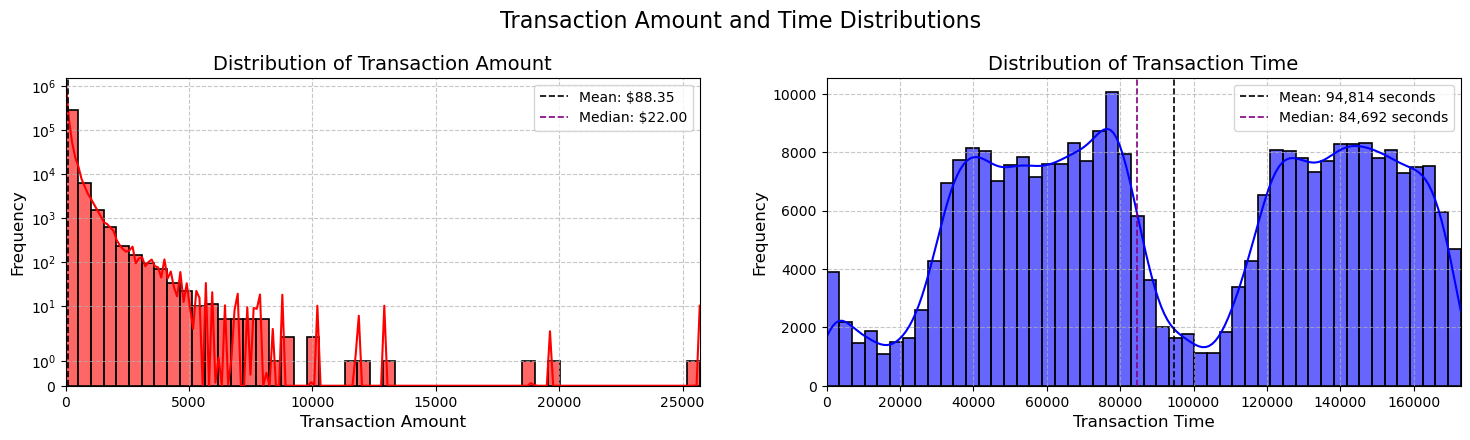

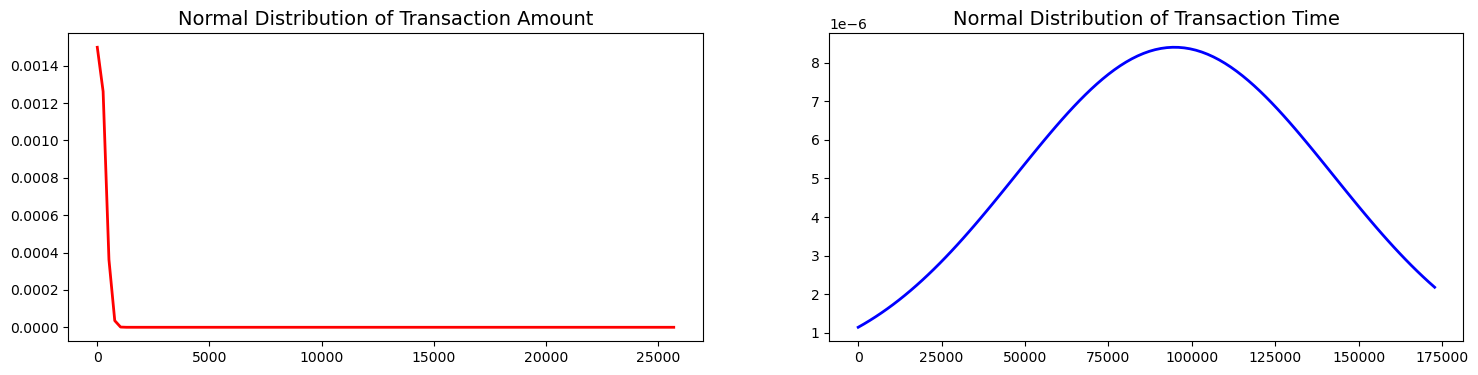

In [ ]:
# %%

# Some useful plots for business practices

amount_val = df['Amount'].values
time_val = df['Time'].values

amount_mean = np.mean(amount_val)
amount_median = np.median(amount_val)
time_mean = np.mean(time_val)
time_median = np.median(time_val)

fig, ax = plt.subplots(1, 2, figsize=(18, 4))

sns.histplot(amount_val, kde=True, color='r', ax=ax[0], bins=50, edgecolor='black', linewidth=1.2, alpha=0.6)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlabel('Transaction Amount', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set_yscale('symlog')  # Used for better visibility of large transactions
ax[0].axvline(amount_mean, color='k', linestyle='--', linewidth=1.2, label=f'Mean: ${amount_mean:,.2f}')
ax[0].axvline(amount_median, color='purple', linestyle='--', linewidth=1.2, label=f'Median: ${amount_median:,.2f}')
ax[0].legend()

sns.histplot(time_val, kde=True, color='b', ax=ax[1], bins=50, edgecolor='black', linewidth=1.2, alpha=0.6)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlabel('Transaction Time', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
ax[1].set_xlim([min(time_val), max(time_val)])
ax[1].axvline(time_mean, color='k', linestyle='--', linewidth=1.2, label=f'Mean: {time_mean:,.0f} seconds')
ax[1].axvline(time_median, color='purple', linestyle='--', linewidth=1.2, label=f'Median: {time_median:,.0f} seconds')
ax[1].legend()

plt.suptitle('Transaction Amount and Time Distributions', fontsize=16, y=1.05)

ax[0].grid(True, linestyle='--', alpha=0.7)
ax[1].grid(True, linestyle='--', alpha=0.7)

plt.savefig("./plots/distribution_plots.png")
plt.show()

# Plot the normal distribution for 'Amount' and 'Time'
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
# Amount distribution
mu_amount, std_amount = norm.fit(amount_val)
x_amount = np.linspace(min(amount_val), max(amount_val), 100)
p_amount = norm.pdf(x_amount, mu_amount, std_amount)
ax[0].plot(x_amount, p_amount, 'r-', linewidth=2)
ax[0].set_title('Normal Distribution of Transaction Amount', fontsize=14)

# Time distribution
mu_time, std_time = norm.fit(time_val)
x_time = np.linspace(min(time_val), max(time_val), 100)
p_time = norm.pdf(x_time, mu_time, std_time)
ax[1].plot(x_time, p_time, 'b-', linewidth=2)
ax[1].set_title('Normal Distribution of Transaction Time', fontsize=14)
plt.savefig("./plots/normal_distributions.png")
plt.show()

In [ ]:
# %%

# Standarization of data

df.insert(0, 'scaled_amount', RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1)))
df.insert(1, 'scaled_time',   RobustScaler().fit_transform(df['Time'].values.reshape(-1,1)))

df.drop(['Time','Amount'], axis=1, inplace=True)

df.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,0.927124,0.118914,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.001727
std,3.495006,0.557903,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-0.307413,-0.994983,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-0.229162,-0.358210,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,0.000000,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,0.770838,0.641790,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,358.683155,1.035022,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


In [ ]:
# %%

# Splitting data

x_tmp = df.drop('Class', axis=1)
y_tmp = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    x_tmp, y_tmp, test_size=0.2, random_state=37, stratify=y_tmp)       #Stratify - Mantener relacion de datos

print (f"length of X_train:{len(X_train)}, length of X_test:{len(X_test)}")

length of X_train:227845, length of X_test:56962


In [ ]:
#%%

# Sub-sampling technique

# Approach: Take randomly the same proportion of non-fraud transaction to avoid wrong correlations.
# Why undersampling? Because our dataset is large enough and we can do it.
# Just taking the same amount for each class.

print ("---Subsampling Approach---")

df_train = pd.concat([X_train, y_train], axis=1)

print ("Before subsampling:")
print (f"Non-Fraud Length:{df_train['Class'].value_counts()[0]}, Fraud Length:{df_train['Class'].value_counts()[1]}")

fraud_df_train = df_train.loc[df_train['Class'] == 1]
non_fraud_df_train = df_train.loc[df_train['Class'] == 0][:len(fraud_df_train)]

print ("After subsampling:")
print (f"Non-Fraud Length:{len(non_fraud_df_train)}, Fraud Length:{len(fraud_df_train)}")

new_df_train = pd.concat([fraud_df_train, non_fraud_df_train]).sample(frac=1, random_state=37)

---Subsampling Approach---
Before subsampling:
Non-Fraud Length:227451, Fraud Length:394
After subsampling:
Non-Fraud Length:394, Fraud Length:394


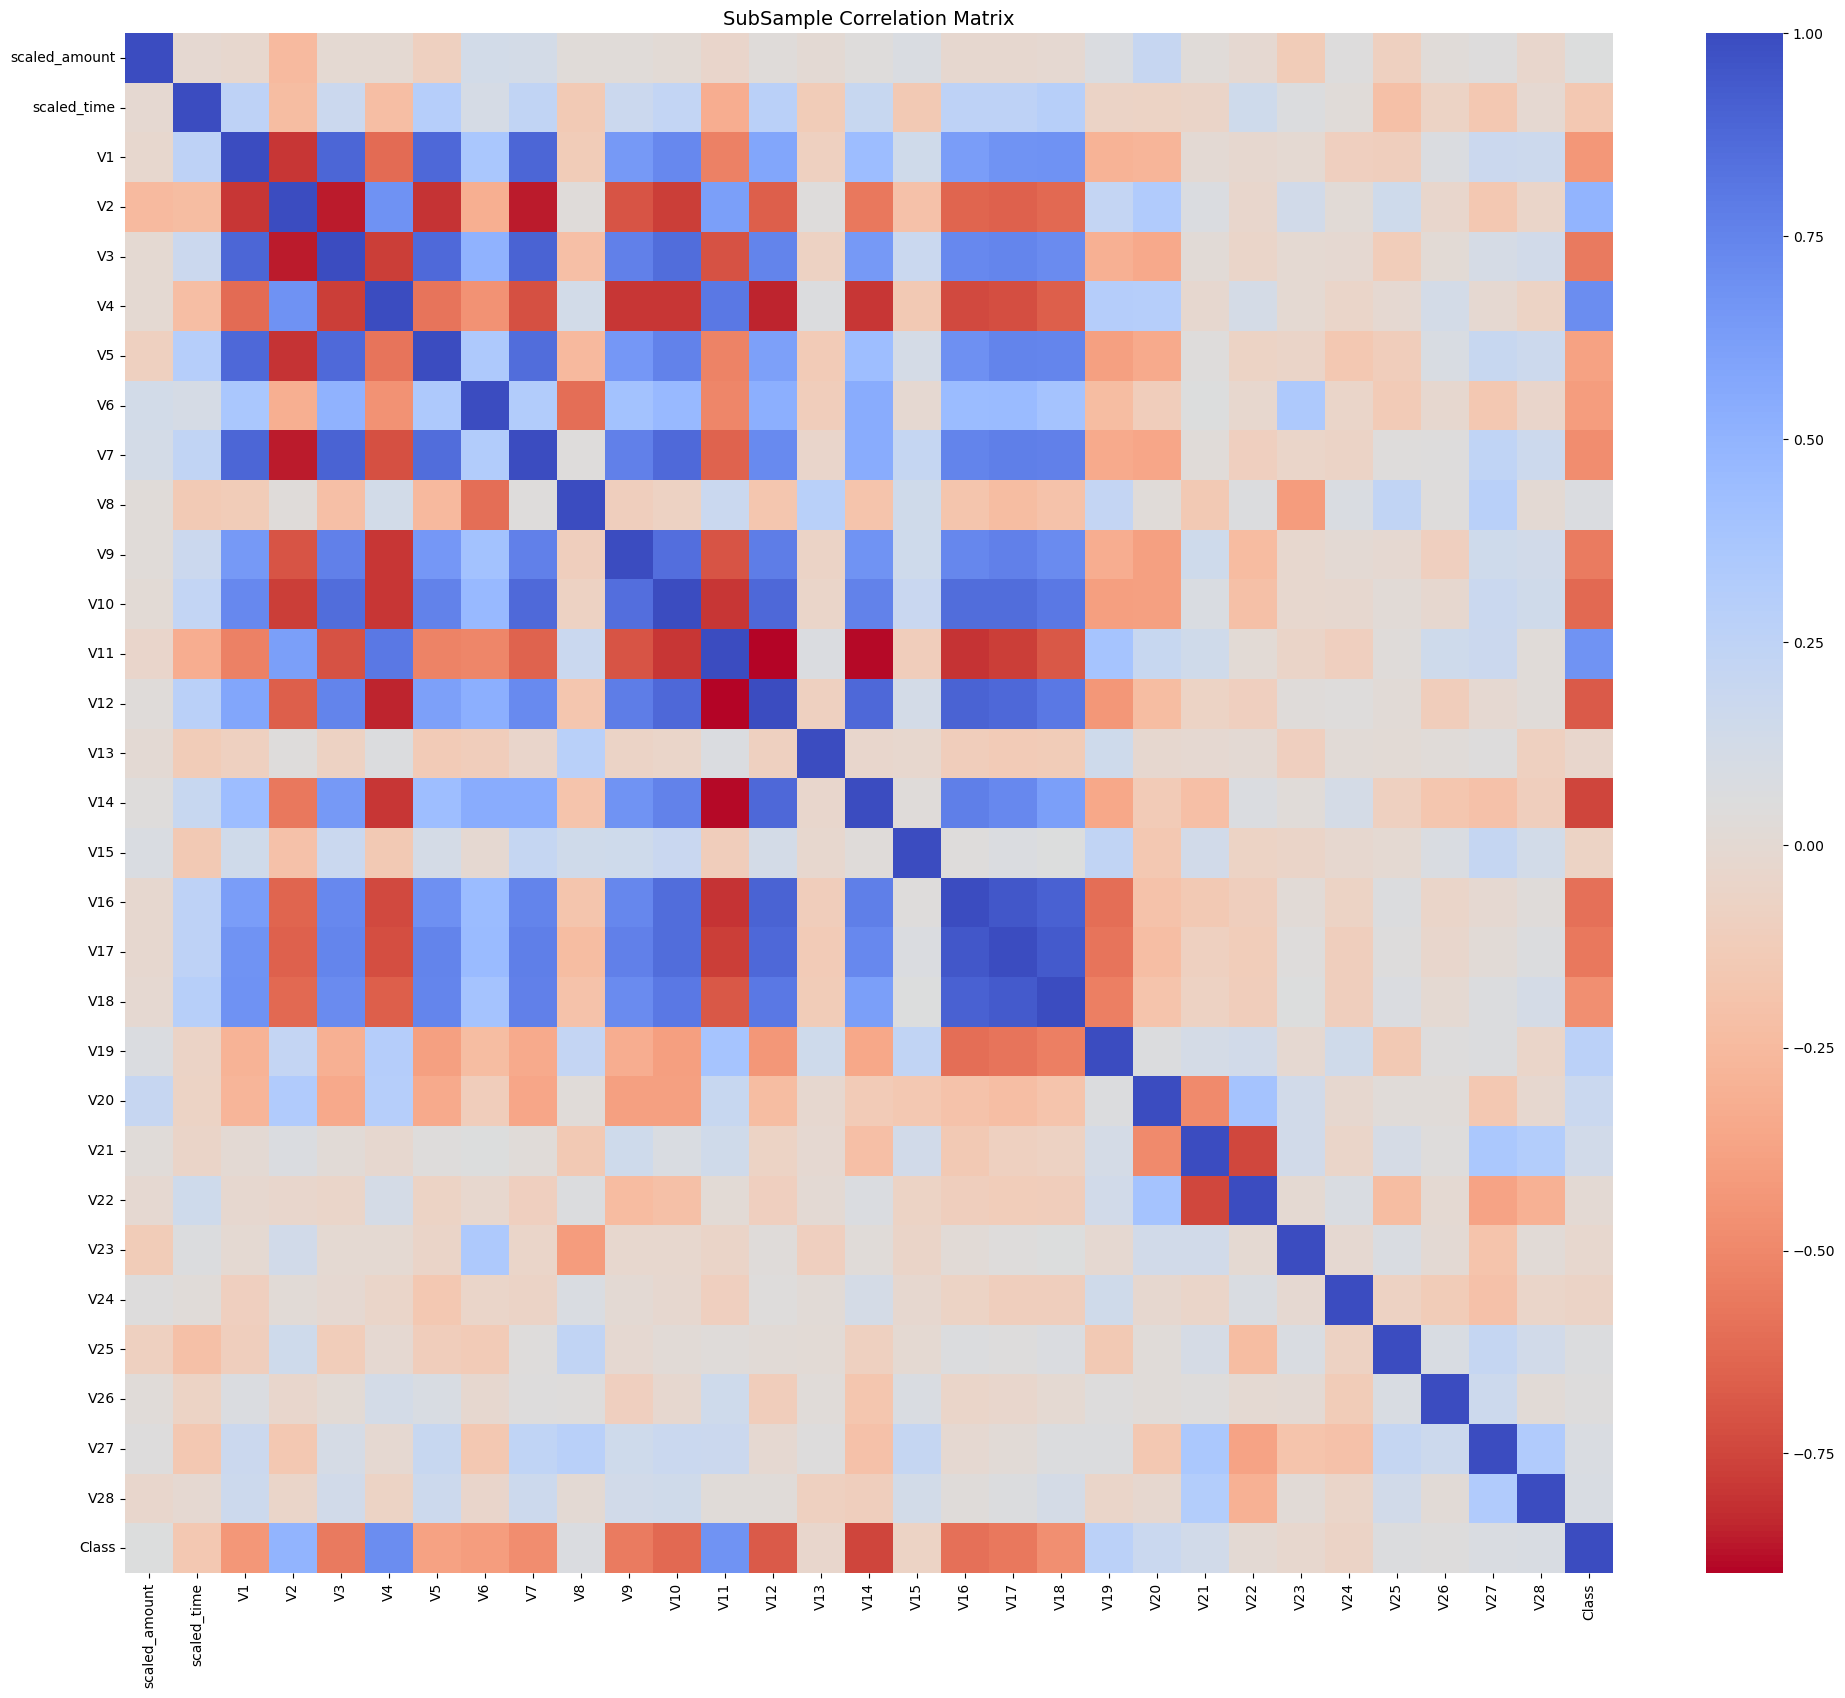

In [ ]:
# %%

plt.figure(figsize=(24,20))
sub_sample_corr = new_df_train.corr(method='pearson', min_periods=1, numeric_only=False)
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('SubSample Correlation Matrix', fontsize=14)
plt.savefig("./plots/corr_matrices.png")
plt.show()

In [ ]:
# %%

print ("Features with + correlation with 'class' (Higher than 0.6:)")
print ([x for x in sub_sample_corr.columns if x != 'Class' and sub_sample_corr.loc[x, 'Class'] > 0.6])

print ("Features with - correlation with 'class' (Lower than 0.6:)")
print ([x for x in sub_sample_corr.columns if x != 'Class' and sub_sample_corr.loc[x, 'Class'] < (-0.6)])

# Print positive correlation features (Higher than 0.4)
print("Positive Correlation between features and class (Higher than 0.6):")
for feature in sub_sample_corr.columns:
    if feature != 'Class' and sub_sample_corr.loc[feature, 'Class'] > 0.6:
        print(f"{feature}: {sub_sample_corr.loc[feature, 'Class']:.2f}")

# Print negative correlation features (Lower than -0.4)
print("Negative Correlation between features and class (Lower than -0.6):")
for feature in sub_sample_corr.columns:
    if feature != 'Class' and sub_sample_corr.loc[feature, 'Class'] < -0.6:
        print(f"{feature}: {sub_sample_corr.loc[feature, 'Class']:.2f}")

Features with + correlation with 'class' (Higher than 0.6:)
['V4', 'V11']
Features with - correlation with 'class' (Lower than 0.6:)
['V10', 'V12', 'V14']
Positive Correlation between features and class (Higher than 0.6):
V4: 0.71
V11: 0.68
Negative Correlation between features and class (Lower than -0.6):
V10: -0.63
V12: -0.68
V14: -0.75


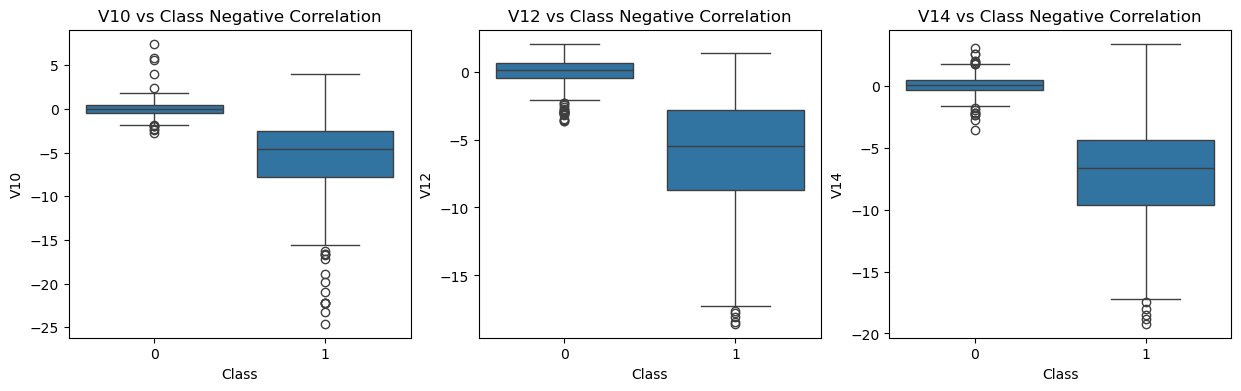

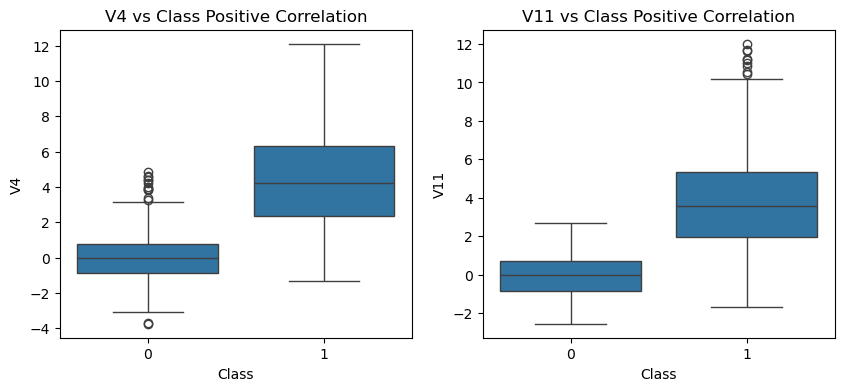

In [ ]:
# %%

f, axes = plt.subplots(ncols=3, figsize=(15,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V10", data=new_df_train, ax=axes[0])
axes[0].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_df_train, ax=axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df_train, ax=axes[2])
axes[2].set_title('V14 vs Class Negative Correlation')

plt.savefig("./plots/neg_corr.png")
plt.show()

f, axes = plt.subplots(ncols=2, figsize=(10,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)

sns.boxplot(x="Class", y="V4", data=new_df_train, ax=axes[0])
axes[0].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V11", data=new_df_train, ax=axes[1])
axes[1].set_title('V11 vs Class Positive Correlation')

plt.savefig("./plots/pos_corr.png")
plt.show()

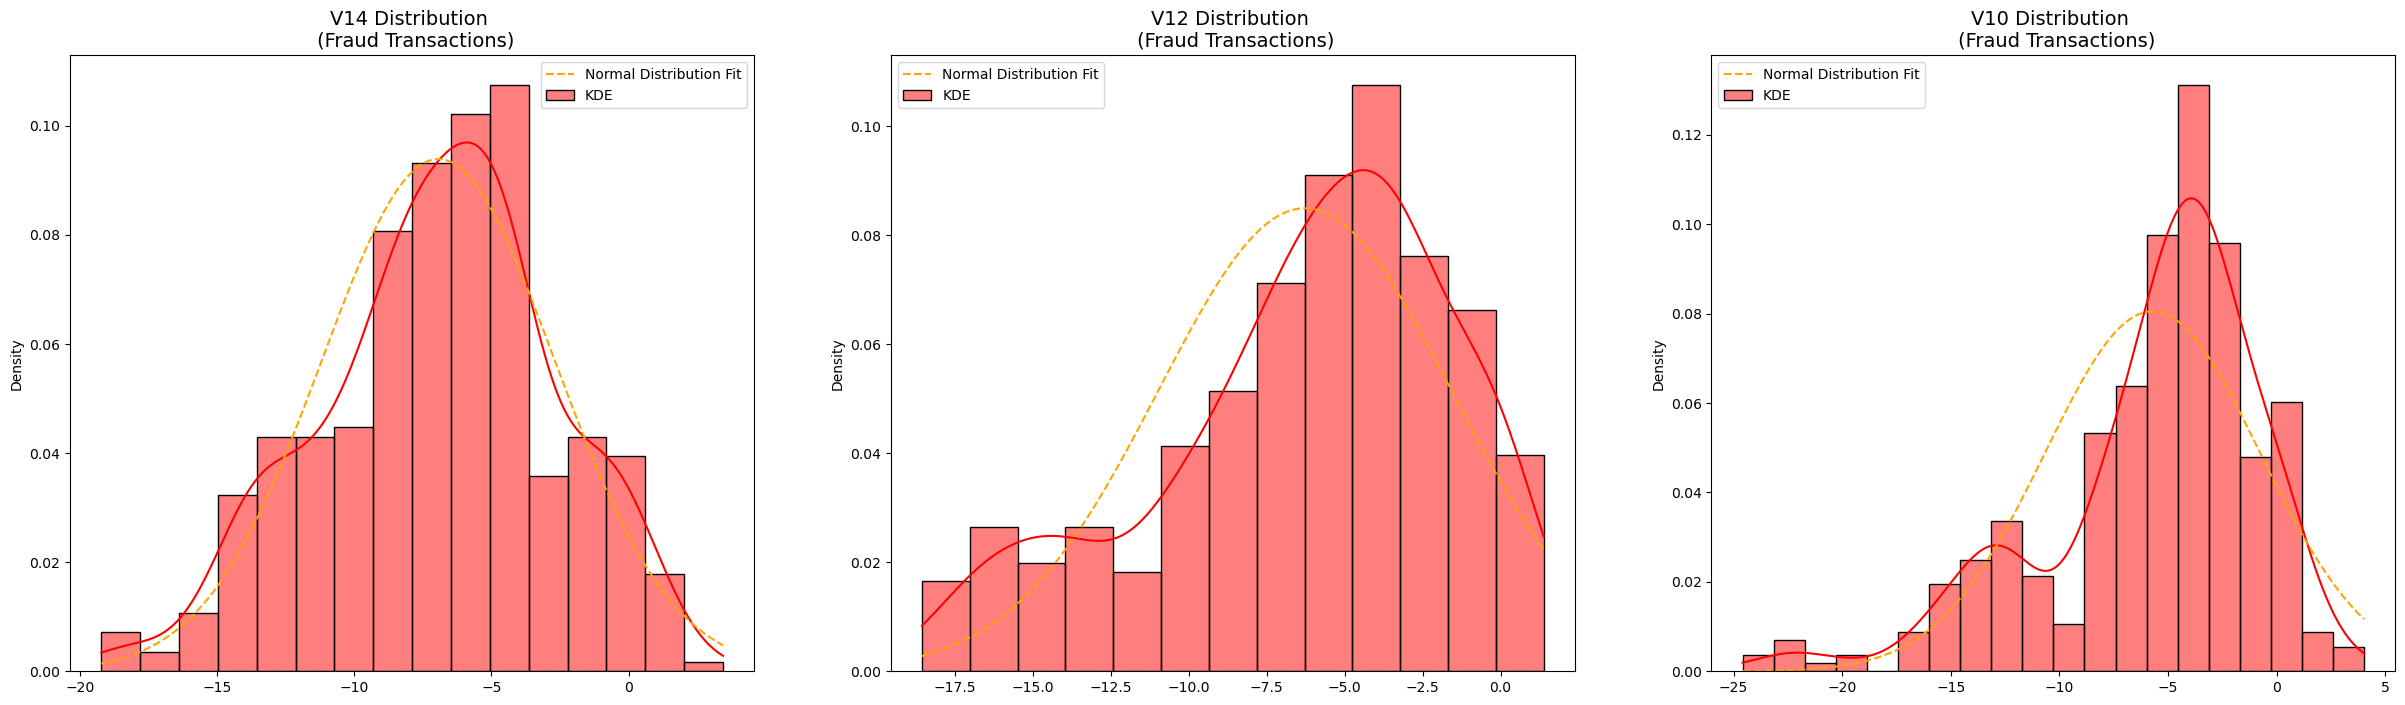

In [ ]:
# %%

# Normal Distributions plots
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30, 8))

# V14 Distribution (Fraud Transactions)
v14_fraud_dist = new_df_train['V14'].loc[new_df_train['Class'] == 1].values
sns.histplot(v14_fraud_dist, ax=ax1, color='r', kde=True, stat="density", label='KDE')
x_vals = np.linspace(min(v14_fraud_dist), max(v14_fraud_dist), 100)
ax1.plot(x_vals, norm.pdf(x_vals, np.mean(v14_fraud_dist), np.std(v14_fraud_dist)), color='orange', linestyle='--', linewidth=1.5, label='Normal Distribution Fit')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)
ax1.legend()

# V12 Distribution (Fraud Transactions)
v12_fraud_dist = new_df_train['V12'].loc[new_df_train['Class'] == 1].values
sns.histplot(v12_fraud_dist, ax=ax2, color='r', kde=True, stat="density", label='KDE')
x_vals = np.linspace(min(v12_fraud_dist), max(v12_fraud_dist), 100)
ax2.plot(x_vals, norm.pdf(x_vals, np.mean(v12_fraud_dist), np.std(v12_fraud_dist)), color='orange', linestyle='--', linewidth=1.5, label='Normal Distribution Fit')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)
ax2.legend()

# V10 Distribution (Fraud Transactions)
v10_fraud_dist = new_df_train['V10'].loc[new_df_train['Class'] == 1].values
sns.histplot(v10_fraud_dist, ax=ax3, color='r', kde=True, stat="density", label='KDE')
x_vals = np.linspace(min(v10_fraud_dist), max(v10_fraud_dist), 100)
ax3.plot(x_vals, norm.pdf(x_vals, np.mean(v10_fraud_dist), np.std(v10_fraud_dist)), color='orange', linestyle='--', linewidth=1.5, label='Normal Distribution Fit')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)
ax3.legend()

plt.savefig("./plots/negft_distr.png")
plt.show()

In [ ]:
# %%

# Anomaly elimination

# V14 removing outliers from fraud transactions
v14_fraud = new_df_train['V14'].loc[new_df_train['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25 for V14: {} | Quartile 75 for V14: {}'.format(q25, q75))
v14_iqr = q75 - q25
print(f"{v14_iqr=}")

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('V14 outliers:{}'.format(outliers))
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))

new_df_train = new_df_train.drop(new_df_train[(new_df_train['V14'] > v14_upper) | (new_df_train['V14'] < v14_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df_train)))
print('----' * 10)

# V12 removing outliers from fraud transactions
v12_fraud = new_df_train['V12'].loc[new_df_train['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
print(f"{v12_iqr=}")

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))

new_df_train = new_df_train.drop(new_df_train[(new_df_train['V12'] > v12_upper) | (new_df_train['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df_train)))
print('----' * 10)


# V10 removing outliers from fraud transactions
v10_fraud = new_df_train['V10'].loc[new_df_train['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25
print(f"{v10_iqr=}")

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))

new_df_train = new_df_train.drop(new_df_train[(new_df_train['V10'] > v10_upper) | (new_df_train['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df_train)))

Quartile 25 for V14: -9.571039042133766 | Quartile 75 for V14: -4.333933542522742
v14_iqr=5.237105499611023
Cut Off: 7.8556582494165355
V14 Lower: -17.4266972915503
V14 Upper: 3.521724706893793
V14 outliers:[-17.4759212828566, -19.2143254902614, -18.4937733551053, -18.0499976898594, -18.8220867423816]
Feature V14 Outliers for Fraud Cases: 5
Number of Instances after outliers removal: 783
----------------------------------------
v12_iqr=5.8458723799953205
V12 Lower: -17.43962657475524
V12 Upper: 5.943862945226041
V12 outliers: [-18.4311310279993, -18.0475965708216, -18.5536970096458]
Feature V12 Outliers for Fraud Cases: 3
Number of Instances after outliers removal: 780
----------------------------------------
v10_iqr=5.030787553194456
V10 Lower: -15.036475635690206
V10 Upper: 5.086674577087616
V10 outliers: [-15.2318333653018, -15.2399619587112, -22.1870885620007, -15.5637913387301, -16.6011969664137, -18.9132433348732, -15.1237521803455, -15.3460988468775, -23.2282548357516, -19.83614

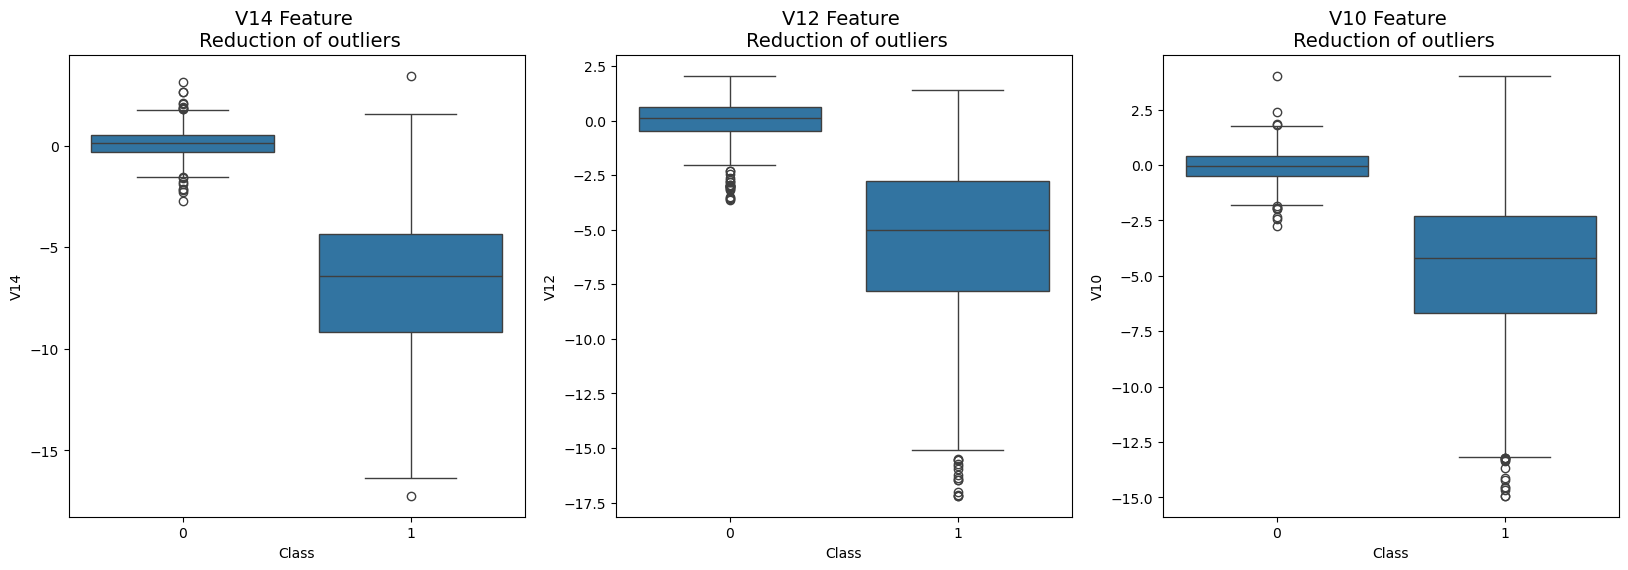

In [ ]:
# %%

#Botplox without outliers
 
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df_train,ax=ax1)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df_train, ax=ax2)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df_train, ax=ax3)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)


plt.savefig("./plots/neg_corr_nools.png")
plt.show() 

In [ ]:
# %%

# Dimensionality Reduction and Clustering - T-SNE for 3D plot

data_embedded_TSNE = TSNE(n_components=3, random_state=37).fit_transform((new_df_train.drop('Class', axis=1)))

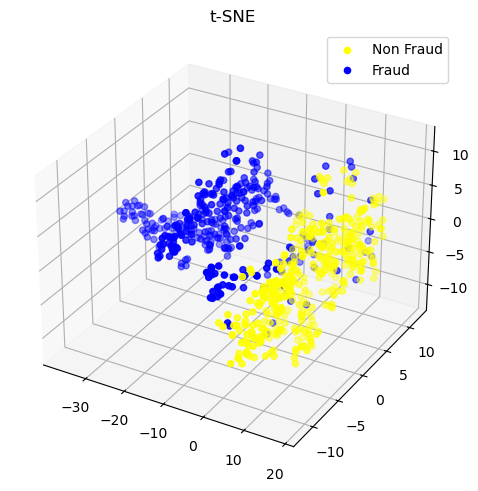

In [ ]:
# %%

fig = plt.figure(facecolor="white", constrained_layout=True)
ax = fig.add_subplot(projection="3d")


sc0, sc1, sc2 = data_embedded_TSNE[:,0], data_embedded_TSNE[:,1], data_embedded_TSNE[:,2]
y_drc = new_df_train['Class']

ax.scatter(data_embedded_TSNE[(y_drc == 0),0], data_embedded_TSNE[(y_drc == 0),1], data_embedded_TSNE[(y_drc == 0),2], c='yellow', label="Non Fraud")
ax.scatter(data_embedded_TSNE[(y_drc == 1),0], data_embedded_TSNE[(y_drc == 1),1], data_embedded_TSNE[(y_drc == 1),2], c='blue', label="Fraud")

ax.legend()

ax.set_title('t-SNE')
ax.grid(True)

plt.savefig("./plots/tsne_3d.png")
plt.show() 

In [ ]:
# %%

# Dimensionality Reduction and Clustering - T-SNE for 2D plot

data_embedded_TSNE = TSNE(n_components=2, random_state=37).fit_transform((new_df_train.drop('Class', axis=1)))

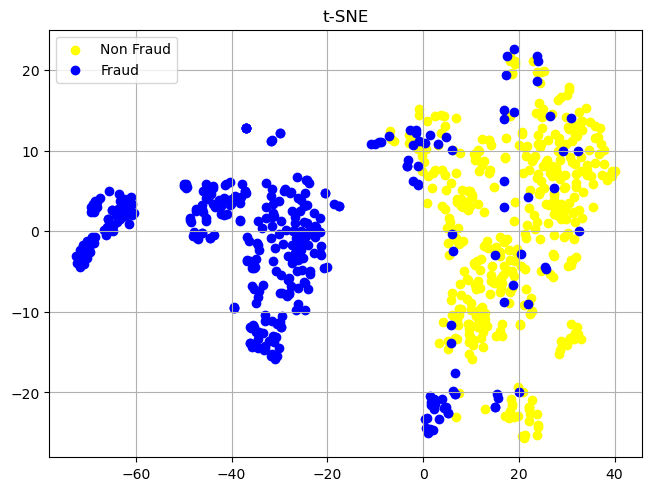

In [ ]:
# %%

fig = plt.figure(facecolor="white", constrained_layout=True)
ax = fig.add_subplot()

ax.scatter(data_embedded_TSNE[(y_drc == 0),0], data_embedded_TSNE[(y_drc == 0),1], c='yellow',  label="Non Fraud")
ax.scatter(data_embedded_TSNE[(y_drc == 1),0], data_embedded_TSNE[(y_drc == 1),1], c='blue',    label="Fraud")

ax.legend()

ax.set_title('t-SNE')
ax.grid(True)

plt.savefig("./plots/tsne_2d.png")
plt.show() 

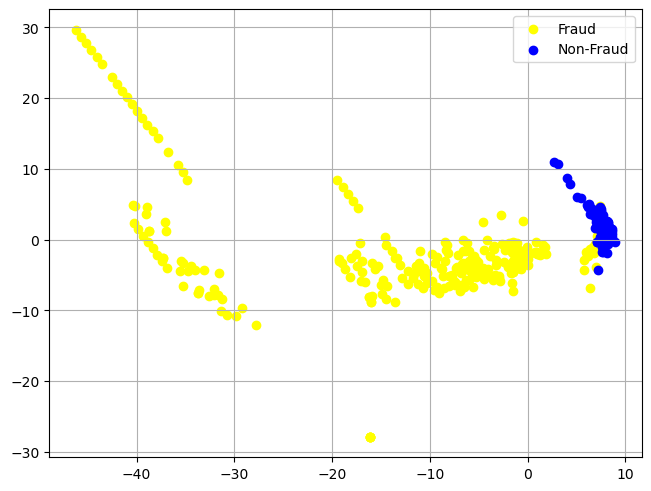

In [ ]:
#%%

# Dimensionality Reduction and Clustering - PCA with 90% of Variability

pca_module_90 = PCA(n_components=0.9, random_state=37)
data_embedded_PCA_90 = pca_module_90.fit_transform((new_df_train.drop('Class', axis=1)))

fig = plt.figure(facecolor="white", constrained_layout=True)
ax = fig.add_subplot()
plt.scatter(data_embedded_PCA_90[(y_drc == 1),0], data_embedded_PCA_90[(y_drc == 1),1],c='yellow', label="Fraud")
plt.scatter(data_embedded_PCA_90[(y_drc == 0),0], data_embedded_PCA_90[(y_drc == 0),1],c='blue', label="Non-Fraud")

plt.legend()
ax.grid(True)
plt.show() 

In [ ]:
# %%

# Dimensionality Reduction and Clustering - PCA with 2 components

pca_module_2 = PCA(n_components=2, random_state=37)
data_embedded_PCA_2 = pca_module_2.fit_transform((new_df_train.drop('Class', axis=1)))

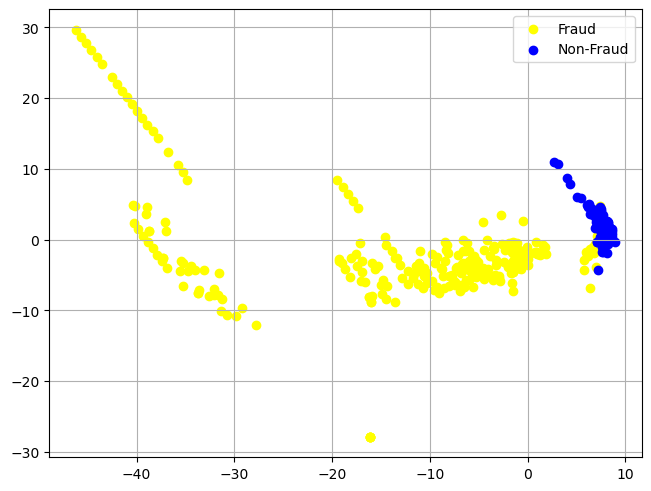

In [ ]:
# %%

fig = plt.figure(facecolor="white", constrained_layout=True)
ax = fig.add_subplot()
plt.scatter(data_embedded_PCA_2[(y_drc == 1),0], data_embedded_PCA_2[(y_drc == 1),1],c='yellow', label="Fraud")
plt.scatter(data_embedded_PCA_2[(y_drc == 0),0], data_embedded_PCA_2[(y_drc == 0),1],c='blue', label="Non-Fraud")

plt.legend()
ax.grid(True)

plt.savefig("./plots/pca.png")
plt.show() 

#--------------------------------

In [ ]:
# %%

### Classification task (is it a fraud case or not?)
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=37),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=37
    ),
    LogisticRegression(),
    GaussianNB()
]
clf_test = [
    KNeighborsClassifier(3),
    LogisticRegression(),
    GaussianNB()
]

In [ ]:
# %%

precision_scorer = make_scorer(precision_score, average='weighted')
recall_scorer = make_scorer(recall_score, average='weighted')
f1_scorer = make_scorer(f1_score, average='weighted')
f2_scorer = make_scorer(fbeta_score, beta=2)

scoring_methods = {
    "precision": precision_scorer,
    "recall": recall_scorer,
    "f1": f1_scorer,
    "f2": f2_scorer
}

In [ ]:
# %%

# Training classifiers

X_subsampling = new_df_train.drop('Class', axis=1)
y_subsampling = new_df_train['Class']

results_cv_sk = [[] for _ in range(len(classifiers))]

for i, clf in enumerate(classifiers):
    for scoring_name, scoring in scoring_methods.items():
        # Cross-validation
        scores = cross_val_score(clf, X_subsampling, y_subsampling,
                                 cv=StratifiedKFold(n_splits=5, random_state=37, shuffle=True), scoring=scoring)
        results_cv_sk[i].append(scores)

In [ ]:
#%%

# Classifiers performance
avg_scores = []

for i, clf_results in enumerate(results_cv_sk):
    clf_name = classifiers[i].__class__.__name__
    print(f"Results for classifier: {clf_name}")

    avg_clf_scores = {}
    for j, score_set in enumerate(clf_results):
        sc_np = np.array(score_set) 
        mean_score = np.mean(sc_np) 

        scoring_key = list(scoring_methods.keys())[j]
        avg_clf_scores[scoring_key] = mean_score

        print(f"Scoring method {list(scoring_methods.keys())[j]}: Mean = {mean_score}")
    avg_scores.append((clf_name, avg_clf_scores))

Results for classifier: KNeighborsClassifier
Scoring method precision: Mean = 0.9350137648987056
Scoring method recall: Mean = 0.9324503311258278
Scoring method f1: Mean = 0.9322491687660003
Scoring method f2: Mean = 0.9045145955982532
Results for classifier: SVC
Scoring method precision: Mean = 0.9401711668293966
Scoring method recall: Mean = 0.9364238410596026
Scoring method f1: Mean = 0.9361852786170811
Scoring method f2: Mean = 0.9042347935286645
Results for classifier: RandomForestClassifier
Scoring method precision: Mean = 0.9316839435574261
Scoring method recall: Mean = 0.9258278145695364
Scoring method f1: Mean = 0.9254116195249669
Scoring method f2: Mean = 0.883993232775017
Results for classifier: LogisticRegression
Scoring method precision: Mean = 0.94396128442911
Scoring method recall: Mean = 0.9430463576158938
Scoring method f1: Mean = 0.9429759827331157
Scoring method f2: Mean = 0.9279534078670759
Results for classifier: GaussianNB
Scoring method precision: Mean = 0.919461

In [ ]:
#%%

#  Classifier comparison
best_classifier = None
best_score = -np.inf

print("\nSummary of classifier performances:")
for clf_name, scores in avg_scores:
    avg_performance = np.mean(list(scores.values())) 
    print(f"{clf_name}: Average performance across metrics = {avg_performance}")

    if avg_performance > best_score:
        best_score = avg_performance
        best_classifier = clf_name

print(f"\nBest classifier for validation set: {best_classifier} with an average score of {best_score}")


Summary of classifier performances:
KNeighborsClassifier: Average performance across metrics = 0.9260569650971967
SVC: Average performance across metrics = 0.9292537700086863
RandomForestClassifier: Average performance across metrics = 0.9167291526067366
LogisticRegression: Average performance across metrics = 0.9394842581612988
GaussianNB: Average performance across metrics = 0.9078410327471084

Best classifier for validation set: LogisticRegression with an average score of 0.9394842581612988


In [ ]:
#%%

# Training and saving best classifier with joblib
best_clf = None

for clf in classifiers:
    if clf.__class__.__name__ == best_classifier:
        best_clf = clf
        break

if best_clf is None:
    raise ValueError(f"Classifier {best_classifier} not found.")

best_clf.fit(X_subsampling, y_subsampling)

model_filename = f'./models/model_LR_undersampling.joblib'
dump(best_clf, model_filename)
print(f"Model {best_clf.__class__.__name__} saved as {model_filename}")

Model LogisticRegression saved as ./models/model_LR_undersampling.joblib


Precision (weighted): 0.9982
Recall (weighted): 0.9631
F1 Score (weighted): 0.9796
F2 Score (weighted): 0.9689


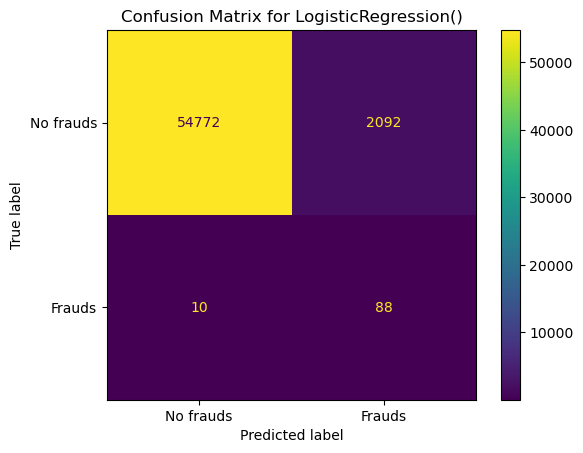

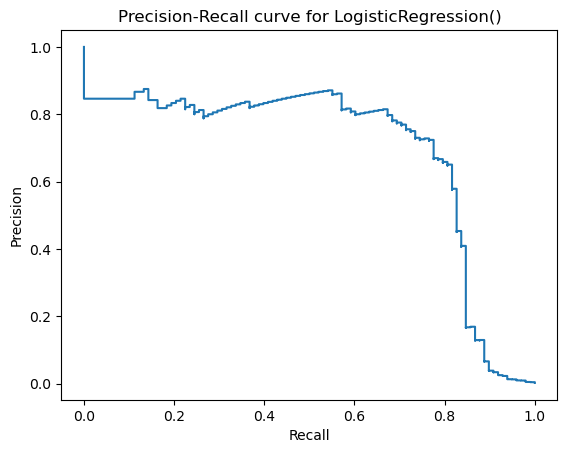

In [ ]:
#%%

# Final test (with previous test dataset taken from original dataframe)

best_clf = load('./models/model_LR_undersampling.joblib')

predictions = best_clf.predict(X_test)

precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
f2 = fbeta_score(y_test, predictions, average='weighted', beta=2)

print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
print(f"F2 Score (weighted): {f2:.4f}")


# Business Plots - Performance before finetuning
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No frauds", "Frauds"])
disp.plot()

plt.title(f"Confusion Matrix for {best_clf}")
plt.savefig("./plots/undersmp_cm")
plt.show()

#Precision - Recall Curve
precision, recall, _ = precision_recall_curve(y_test, best_clf.predict_proba(X_test)[:, 1])

plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve for {best_clf}')
plt.savefig('./plots/undersmp_pr')
plt.show()

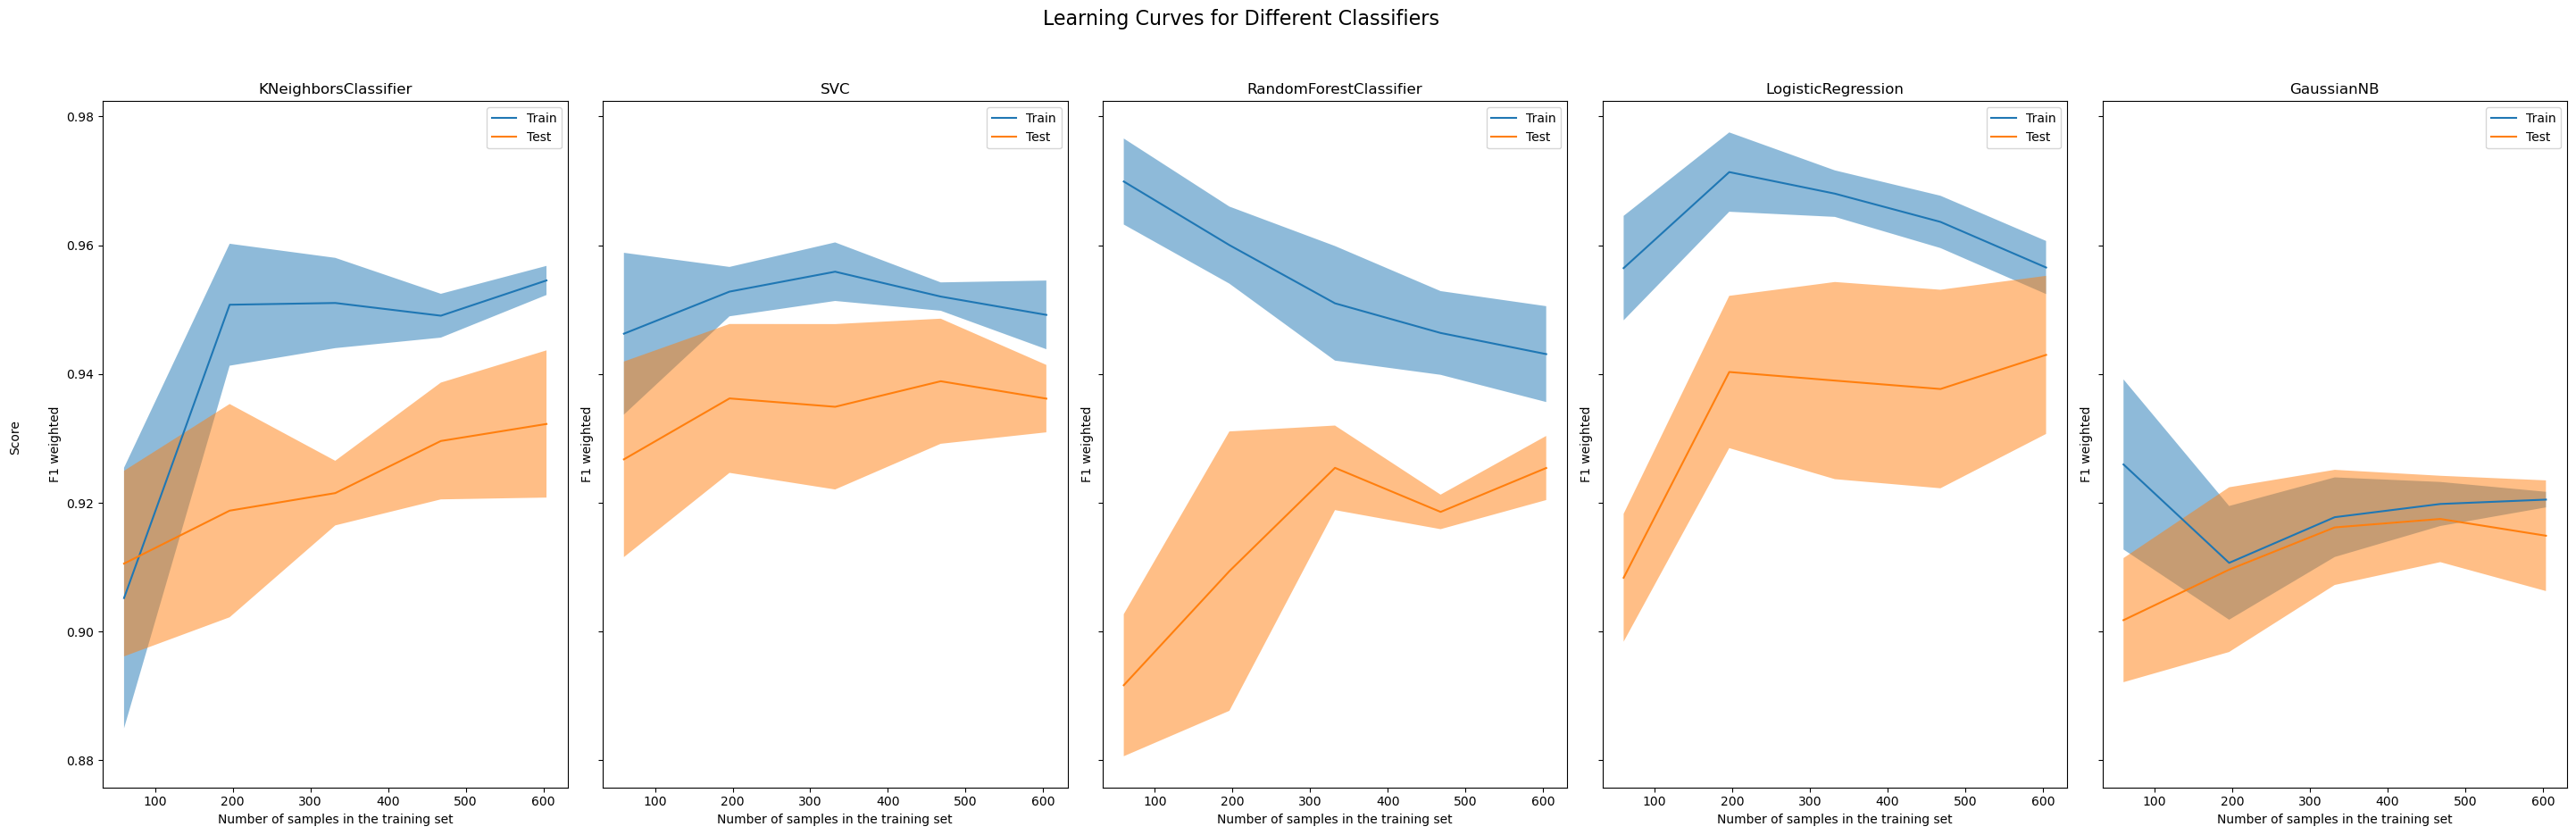

In [ ]:
# %% 

# Learning curves
fig, ax = plt.subplots(nrows=1, ncols=len(classifiers), sharey=True, figsize=(30,10))

for i, clf in enumerate(classifiers):
    LearningCurveDisplay.from_estimator(clf, X_subsampling, y_subsampling, 
                                        cv=StratifiedKFold(n_splits=5, random_state=37, shuffle=True), 
                                        scoring="f1_weighted", ax=ax[i], n_jobs=1)
    ax[i].set_title(f"{clf.__class__.__name__}")

fig.text(0.04, 0.5, 'Score', va='center', rotation='vertical')
fig.suptitle('Learning Curves for Different Classifiers', fontsize=16)
fig.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.savefig("./plots/lc.png")
plt.show()

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameters: {'C': 0.3, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Best model: LogisticRegression(C=0.3, class_weight='balanced', max_iter=7000,
                   random_state=37, solver='liblinear')
Precision (weighted): 0.9982
Recall (weighted): 0.9631
F1 Score (weighted): 0.9796
F2 Score (weighted): 0.9689


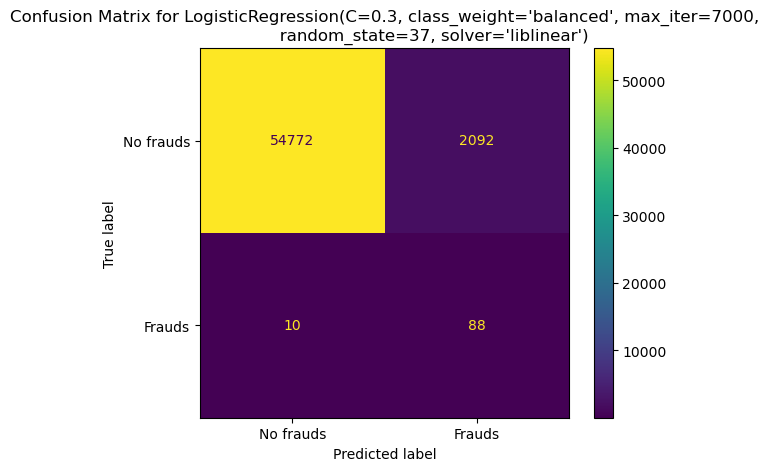

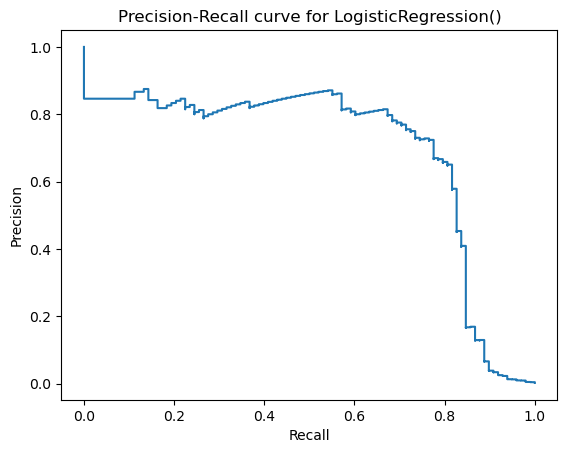

In [ ]:
#%%

#Hyperparameter Tuning for best classifier (The metric improve?)

def f2_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

f2_scorer = make_scorer(f2_score)

LogisticRegression_model = LogisticRegression(max_iter=7000, random_state=37)

param_grid = {
    'penalty': ['l2'],
    'C': [1.0, 0.5, 0.1, 0.3, 0.7, 0.2, 0.4],
    'class_weight': ['balanced', None],
    'solver': ['lbfgs', 'liblinear', 'newton-cholesky'],
}

grid_search = GridSearchCV(estimator=LogisticRegression_model,
                           param_grid=param_grid,
                           scoring=f2_scorer,
                           cv=5,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_subsampling, y_subsampling)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best model: {grid_search.best_estimator_}")

model_grid_search = grid_search.best_estimator_

model_grid_search.fit(X_subsampling, y_subsampling)
predictions_grid_search = best_clf.predict(X_test)

precision = precision_score(y_test, predictions_grid_search, average='weighted')
recall = recall_score(y_test, predictions_grid_search, average='weighted')
f1 = f1_score(y_test, predictions_grid_search, average='weighted')
f2 = fbeta_score(y_test, predictions_grid_search, average='weighted', beta=2)

print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
print(f"F2 Score (weighted): {f2:.4f}")

cm = confusion_matrix(y_test, predictions_grid_search)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No frauds", "Frauds"])
disp.plot()

plt.title(f"Confusion Matrix for {model_grid_search}")
plt.savefig('./plots/grid_search_cm')
plt.show()

#Precision - Recall Curve
precision, recall, _ = precision_recall_curve(y_test, best_clf.predict_proba(X_test)[:, 1])

plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve for {best_clf}')
plt.savefig('./plots/grid_search_pr')
plt.show()

In [ ]:
# %%

# Under and Over-sampling technique

In [ ]:
#%%

pipeline = Pipeline(steps=[
    ('under', RandomUnderSampler()),  
    ('over', SMOTE()),            
    ('classifier', LogisticRegression(max_iter=1000, random_state=37))
])

param_grid = {
    'under__sampling_strategy': [0.003, 0.005, 0.1],  
    'over__sampling_strategy': [0.1, 0.3, 0.5, 0.6],   
    'classifier__penalty': ['l2'],
    'classifier__C': [0.5, 0.1, 0.3, 0.2, 0.4, 1],
    'classifier__class_weight': ['balanced', None],
    'classifier__solver': ['lbfgs', 'liblinear', 'newton-cholesky'],
}

grid_search = GridSearchCV(pipeline, param_grid, scoring='recall', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:")
print(grid_search.best_params_)

model_filename = f'./models/model_{grid_search.__class__.__name__}.joblib'
dump(best_clf, model_filename)
print(f"Model {grid_search.__class__.__name__} saved as {model_filename}")

c:\Users\joaqu\anaconda3\envs\data_science\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
180 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\joaqu\anaconda3\envs\data_science\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\joaqu\anaconda3\envs\data_science\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\joaqu\anaconda3\envs\data_science\Lib\site-p

Best parameters:
{'classifier__C': 0.4, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs', 'over__sampling_strategy': 0.5, 'under__sampling_strategy': 0.1}
Model GridSearchCV saved as ./models/model_GridSearchCV.joblib


In [ ]:
# %%

# Classifier trained for a good performance (85% recall, 50% precision)
pipeline_training_data = Pipeline(steps=[
    ('under', RandomUnderSampler(sampling_strategy=0.005)),  
    ('over', SMOTE(sampling_strategy=0.1))
])

X_resampled, y_resampled = pipeline_training_data.fit_resample(X_train, y_train)

print(f"Original dataset shape: {Counter(y_train)}")
print(f"Resampled dataset shape: {Counter(y_resampled)}")

best_classifier_unov = LogisticRegression(penalty='l2', C=0.1, class_weight=None, solver='liblinear', random_state=37)
best_classifier_unov.fit(X_resampled,y_resampled)
predictions_unov = best_classifier_unov.predict(X_test)

Original dataset shape: Counter({0: 227451, 1: 394})
Resampled dataset shape: Counter({0: 78800, 1: 7880})


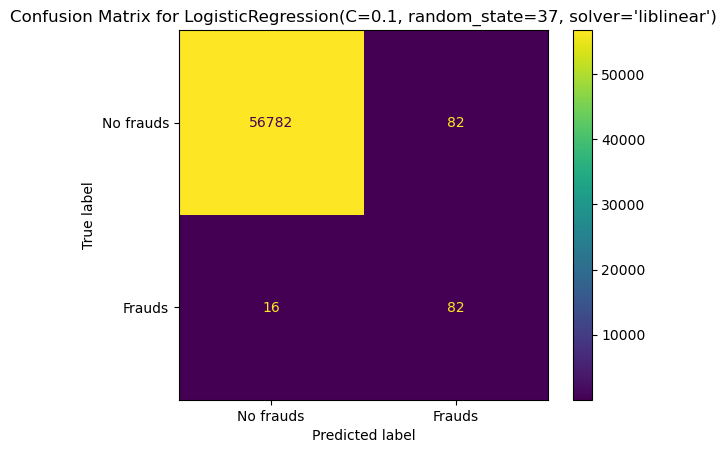

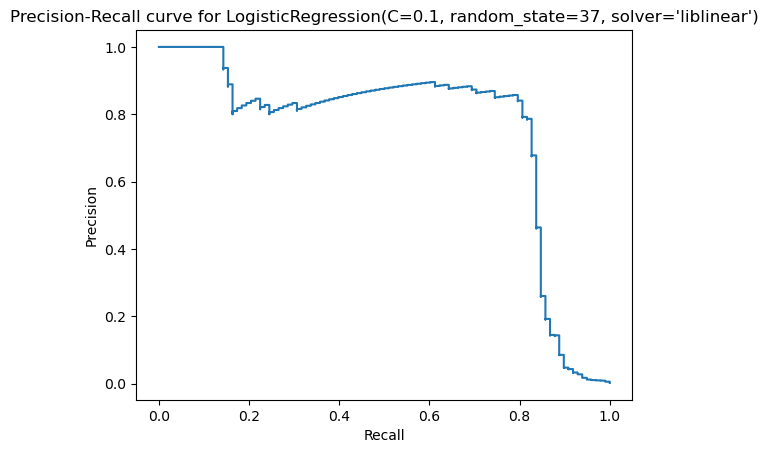

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.84      1.00      0.91      0.85     56864
          1       0.50      0.84      1.00      0.63      0.91      0.82        98

avg / total       1.00      1.00      0.84      1.00      0.91      0.85     56962



In [ ]:
#%%

# Confusion Matrix

cm = confusion_matrix(y_test, predictions_unov)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No frauds", "Frauds"])
disp.plot()

plt.title(f"Confusion Matrix for {best_classifier_unov}")
plt.savefig("plots/unov_cm_1")
plt.show()

#Precision - Recall Curve
precision, recall, _ = precision_recall_curve(y_test, best_classifier_unov.predict_proba(X_test)[:, 1])

plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall curve for {best_classifier_unov}')
plt.savefig("plots/unov_pr_1")
plt.show()

print(classification_report_imbalanced(y_test, predictions_unov))

In [ ]:
#%%

model_filename = f'./models/model_LR_unovsampling_1.joblib'
dump(best_classifier_unov, model_filename)
print(f"Model {best_classifier_unov.__class__.__name__} saved as {model_filename}")

Model LogisticRegression saved as ./models/model_LR_unovsampling_1.joblib


In [ ]:
# %%

#Classifier trained for the best recall (90% recall)
pipeline_training_data = Pipeline(steps=[
    ('under', RandomUnderSampler(sampling_strategy=0.1, random_state=37)),  
    ('over', SMOTE(sampling_strategy=0.6, random_state=37))
])

X_resampled, y_resampled = pipeline_training_data.fit_resample(X_train, y_train)

print(f"Original dataset shape: {Counter(y_train)}")
print(f"Resampled dataset shape: {Counter(y_resampled)}")

best_classifier_unov = LogisticRegression(penalty='l2', C=0.1, class_weight='balanced', solver='newton-cholesky', random_state=37)
best_classifier_unov.fit(X_resampled,y_resampled)
predictions_unov = best_classifier_unov.predict(X_test)

Original dataset shape: Counter({0: 227451, 1: 394})
Resampled dataset shape: Counter({0: 3940, 1: 2364})


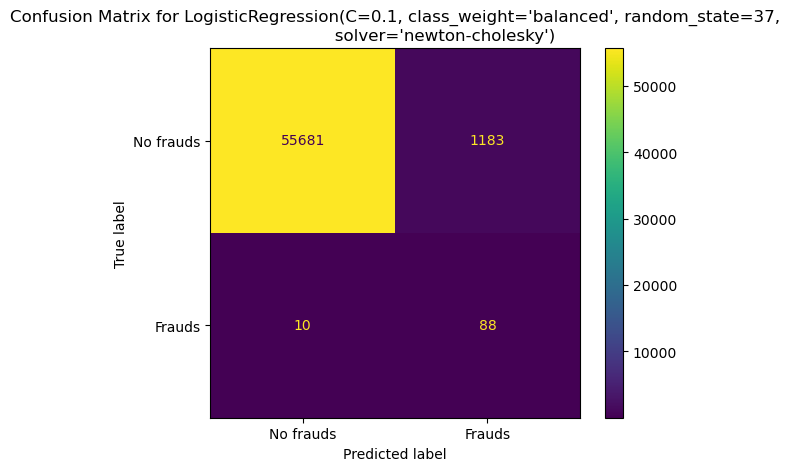

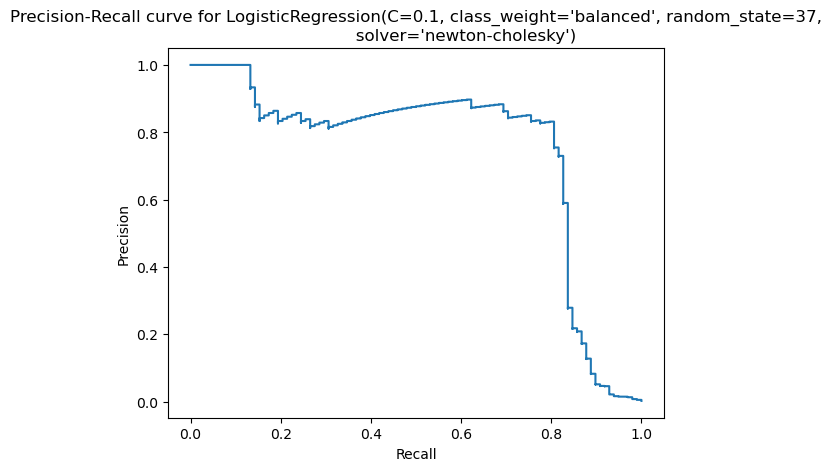

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      0.90      0.99      0.94      0.89     56864
          1       0.07      0.90      0.98      0.13      0.94      0.87        98

avg / total       1.00      0.98      0.90      0.99      0.94      0.89     56962



In [ ]:
# %%

# Confusion matrix
cm = confusion_matrix(y_test, predictions_unov)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No frauds", "Frauds"])
disp.plot()

plt.title(f"Confusion Matrix for {best_classifier_unov}")
plt.savefig("plots/unov_cm_2")
plt.show()

#Precision - Recall Curve
precision, recall, _ = precision_recall_curve(y_test, best_classifier_unov.predict_proba(X_test)[:, 1])

plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.title(f'Precision-Recall curve for {best_classifier_unov}')
plt.savefig("plots/unov_pr_2")
plt.show()

print(classification_report_imbalanced(y_test, predictions_unov))

In [ ]:
# %%

model_filename = f'./models/model_LR_unovsampling_2.joblib'
dump(best_classifier_unov, model_filename)
print(f"Model {best_classifier_unov.__class__.__name__} saved as {model_filename}")

Model LogisticRegression saved as ./models/model_LR_unovsampling_2.joblib
